In [1]:
import va_utils
import va_plots
import cantoria_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=1.25)
sns.color_palette("Greys")
plt.rcParams.update({"figure.dpi": 300})

2024-09-15 03:42:22.239395: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 03:42:22.239431: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 03:42:22.239459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-15 03:42:22.247219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
sh: 1: load_ext: not found


In [2]:
holdout_sscs_metrics = pd.DataFrame()
holdout_cantoria_metrics = pd.DataFrame()

In [3]:
for model in range(5):
    if (model == 0):
        log_folder = 'mask_voas_cnn'
        model_name = 'MaskVoasCNN'
    elif (model == 1):
        log_folder = 'mask_voas_v2'
        model_name = 'MaskVoasCNNv2'
    #elif (model == 2):
        #log_folder = 'downsample_voas_cnn'
        #model_name = 'DownsampleVoasCNN'
    elif (model == 2):
        log_folder = 'downsample_voas_v2'
        model_name = 'DownsampleVoasCNNv2'
    elif (model == 3):
        log_folder = 'voas_cnn_retreino'
        model_name = 'VoasCNN (Retrained)'
    elif (model == 4):
        log_folder = 'voas_cnn_original'
        model_name = 'VoasCNN (Original Weights)'

    metrics_dir = './Evaluation_Data/' + log_folder + '_f-scores_treino1.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)
    sop_metrics['F1-Score'] = sop_metrics['F-Measure']
    alto_metrics['F1-Score'] = alto_metrics['F-Measure']
    ten_metrics['F1-Score'] = ten_metrics['F-Measure']
    bass_metrics['F1-Score'] = bass_metrics['F-Measure']
    sop_metrics['Voice'] = 'Soprano'
    alto_metrics['Voice'] = 'Alto'
    ten_metrics['Voice'] = 'Tenor'
    bass_metrics['Voice'] = 'Bass'
    sop_metrics['Model'] = model_name
    alto_metrics['Model'] = model_name
    ten_metrics['Model'] = model_name
    bass_metrics['Model'] = model_name
    
    tmp_sscs_metrics = pd.concat([sop_metrics, alto_metrics, ten_metrics, bass_metrics])[['F1-Score', 'Voice', 'Model']]
    holdout_sscs_metrics = pd.concat([holdout_sscs_metrics, tmp_sscs_metrics]).reset_index(drop=True)

In [4]:
for model in range(6):
    if (model == 0):
        log_folder = 'mask_voas_cnn'
        model_name = 'MaskVoasCNN'
    elif (model == 1):
        log_folder = 'mask_voas_v2'
        model_name = 'MaskVoasCNNv2'
    elif (model == 2):
        log_folder = 'downsample_voas_cnn'
        model_name = 'DownsampleVoasCNN'
    elif (model == 3):
        log_folder = 'downsample_voas_v2'
        model_name = 'DownsampleVoasCNNv2'
    elif (model == 4):
        log_folder = 'voas_cnn_retreino'
        model_name = 'VoasCNN (Retrained)'
    elif (model == 5):
        log_folder = 'voas_cnn_original'
        model_name = 'VoasCNN (Original Weights)'

    print(f"Model {model}...")

    if(model != 2):

        mix_df, sop_df, alto_df, ten_df, bass_df = cantoria_utils.compute_holdout_metrics(model)
        sop_df['F1-Score'] = sop_df['F-Measure']
        alto_df['F1-Score'] = alto_df['F-Measure']
        ten_df['F1-Score'] = ten_df['F-Measure']
        bass_df['F1-Score'] = bass_df['F-Measure']
        sop_df['Voice'] = 'Soprano'
        alto_df['Voice'] = 'Alto'
        ten_df['Voice'] = 'Tenor'
        bass_df['Voice'] = 'Bass'
        sop_df['Model'] = model_name
        alto_df['Model'] = model_name
        ten_df['Model'] = model_name
        bass_df['Model'] = model_name
        
        tmp_cantoria_metrics = pd.concat([sop_df, alto_df, ten_df, bass_df])[['F1-Score', 'Voice', 'Model']]
        holdout_cantoria_metrics = pd.concat([holdout_cantoria_metrics, tmp_cantoria_metrics]).reset_index(drop=True)


Model 0...


2024-09-15 03:42:27.064514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-15 03:42:27.072710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-15 03:42:27.076825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 0s 203ms/step
Model 1...
1/1 [==============================] - 0s 92ms/step
Model 2...
Model 3...
1/1 [==============================] - 0s 21ms/step
Model 4...
1/1 [==============================] - 1s 695ms/step
Model 5...
1/1 [==============================] - 0s 20ms/step


In [44]:
medians_holdout_sscs = holdout_sscs_metrics.groupby(["Voice", "Model"]).median()
medians_holdout_cantoria = holdout_cantoria_metrics.groupby(["Voice", "Model"]).median()

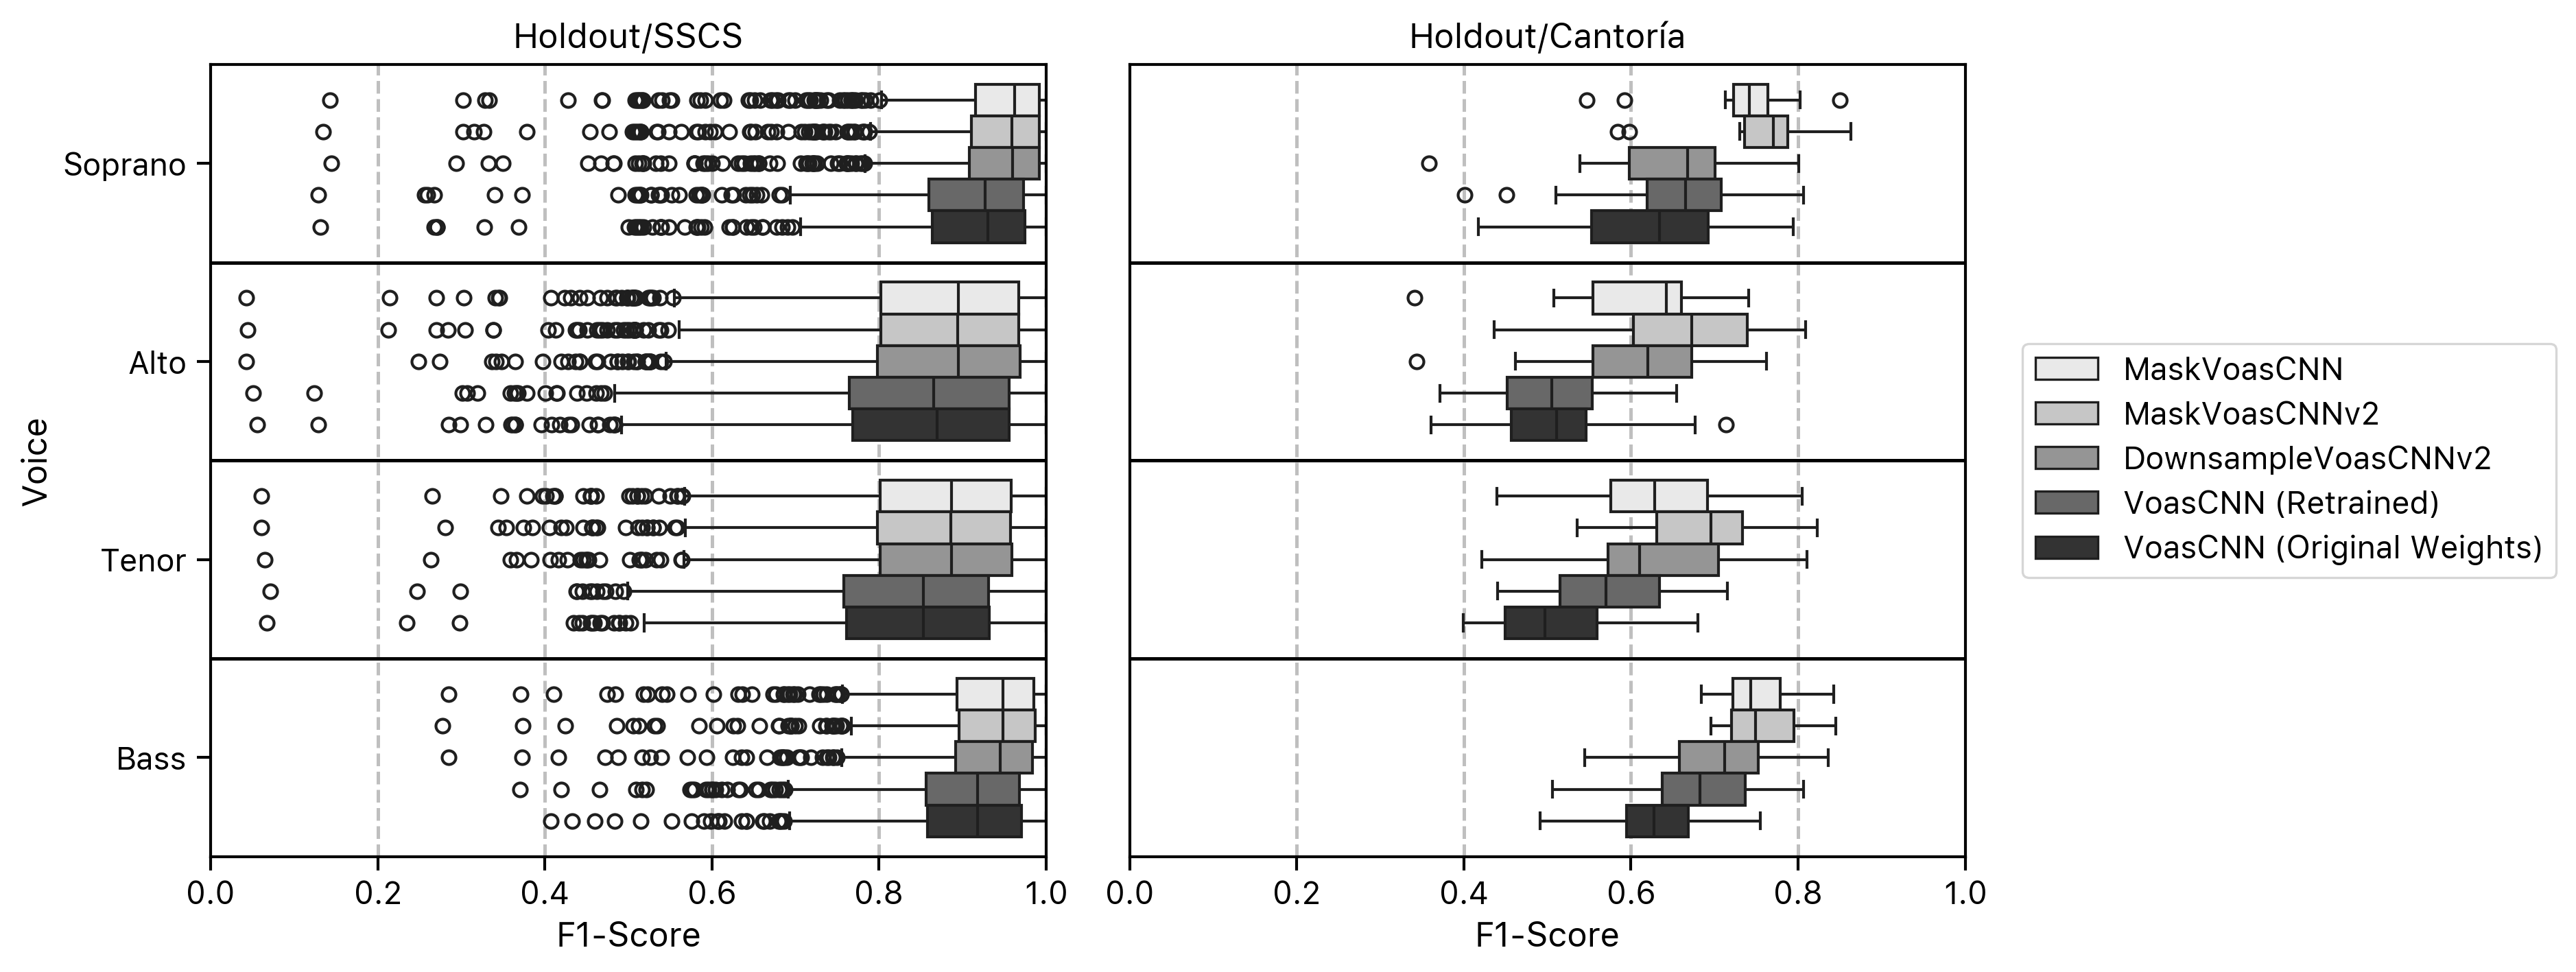

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))

for i in range(0, 2):
    ax[i].axhline(0.5, c='black')
    ax[i].axhline(1.5, c='black')
    ax[i].axhline(2.5, c='black')

    ax[i].axvline(0.2, c='grey', alpha=0.5, ls='--', zorder=0)
    ax[i].axvline(0.4, c='grey', alpha=0.5, ls='--', zorder=0)
    ax[i].axvline(0.6, c='grey', alpha=0.5, ls='--', zorder=0)
    ax[i].axvline(0.8, c='grey', alpha=0.5, ls='--', zorder=0)

ax[0].set_title('Holdout/SSCS')
ax[1].set_title('Holdout/Cantoría')

strip_sscs = sns.boxplot(
    data=holdout_sscs_metrics, x="F1-Score", y="Voice", hue="Model",
    dodge=True, zorder=1, legend=False, palette="Greys", ax=ax[0]
)

strip_cantoria = sns.boxplot(
    data=holdout_cantoria_metrics, x="F1-Score", y="Voice", hue="Model",
    dodge=True, zorder=1, palette="Greys", ax=ax[1]
)

plt.subplots_adjust(wspace=0.1)

ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[0].set_xlim([0, 1])
ax[1].set_xlim([0, 1])
ax[1].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')